In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

In [2]:
#Definición de unidades
    #Escalas
um=1e-6
mm=1e-3
nm=1e-9
    #Tamaño imagen
N=200
M=200
    #longitud de onda
w_length=632*nm
    #Tamaño de pixel
dx=dy=1*um #equivalencia con el mundo físico

In [3]:
#Transformada de Fresnel 2
def T_fre(U_f,dx_f,dy_f,z_f,wave_length):
    
    k= 2*np.pi/wave_length
    N_f,M_f=np.shape(U_f) #The shape of an array is the number of elements in each dimension
    x=np.arange(-int(M_f/2),int(M_f/2),1) #arreglo desde -la mitad del número de elementos que tenga cada dimensión
    y=np.arange(-int(N_f/2),int(N_f/2),1) #hasta la mitad de número de elementos en cada dimensión, con pasos de a 1.
    X,Y=np.meshgrid(x,y) #Return coordinate matrices from coordinate vectors.
    
     #dimensionando
    fX=X*(dx_f) 
    fY=Y*(dy_f)
    U_prima=(U_f*np.exp((-1j*k/(2*z_f))*((fX**2)+(fY**2)))) #U'
    U_dprima=np.fft.fftshift(np.fft.fft2(U_prima*dx_f**2)) #U''
    
    C1=np.exp(1j*k*z_f)/(1j*wave_length*z_f) #e^(ikz)/ilambda z
    C2=(1j*k)/(2*z_f)#ik/2 z
    
    fXs=X*(wave_length*z_f/(N_f*dx_f))
    fYs=Y*(wave_length*z_f/(M_f*dy_f))
    
    U_sal=C1*np.exp(C2*(fXs**2+fYs**2))*U_dprima

    plt.figure()
    plt.imshow(np.angle(
    U_prima))    
    plt.show()
  
    plt.figure()
    plt.imshow(np.angle(U_dprima))    
    plt.show()
    
    #plt.figure()
    #plt.imshow(np.angle(U_sal))    
    #plt.show()
    
    return U_sal

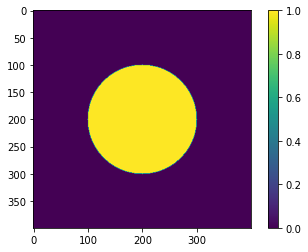

In [4]:
mask2 = np.zeros((400,400),dtype="uint8")
coordy=int((400,400)[0]/2)
coordx=int((400,400)[1]/2)

cv2.circle(mask2,(coordy,coordx),100,1,-1)
plt.figure()
plt.imshow(mask2)
plt.colorbar()
plt.show()

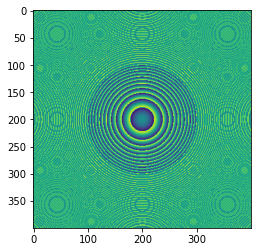

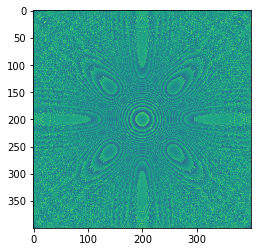

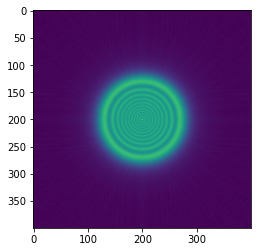

In [6]:
z2=742*um
T_prop=T_fre(mask2,dx,dy,z2,w_length)

plt.figure()
plt.imshow( 
    np.abs(T_prop)
        )
plt.show()